# Análise Exploratória campeonato brasileiro de futebol pontos corridos série A 2009-2018

### Para entender o raciocínio por trás desta análise, escrevi um artigo no Medium para ser complementar a leitura desse código. Acesse em: https://medium.com/@brunomesquitazamberlan/an%C3%A1lise-explorat%C3%B3ria-em-python-teoria-x-pr%C3%A1tica-d57ba1202166

In [138]:
import pandas as pd
import numpy as np
import matplotlib as pl
import seaborn as sb

### Explicação técnica Python parte 1:

Recomendo iniciar com um curso básico de Python. Existem vários disponíveis, minhas fontes recomendadas para você buscá-los são: Udemy, Udacity e Codeacademy. Neles, você aprendará como instalar o Python, as principais funções, estrutura de dados e controle de fluxo. Com isso, já é possível entender em mais detalhes o que estará escrito aqui.

Creio que a "mágica" para quem quer trabalhar com dados está em saber utilizar as 2 bibliotecas básicas para dados:

Pandas -> é a principal biblioteca do Python. Utilizaremos ela na maioria do tempo. Para saber mais, acesse: https://medium.com/data-hackers/uma-introdu%C3%A7%C3%A3o-simples-ao-pandas-1e15eea37fa1 http://pythonize.org/analise-dados-pandas.html

Numpy -> é a base do Pandas. Para saber mais, acesse:
https://medium.com/ensina-ai/entendendo-a-biblioteca-numpy-4858fde63355

### Explicação técnica Python parte 2:

Para uma análise inicial dos dados (serão referenciados como o dataset), utilizaremos três funções da biblioteca Pandas: **head()**, **tail()** e **read_csv()**, conforme pode ser visto nas células abaixo.

In [139]:
pd.read_csv('Brasileiro.csv').head()

,ANO;Posicao;Time;Pontos;Vitoria;Empates;Derrotas;Gols pro;Gols Contra;Saldo Gols;Aproveitamento;Estados
0,2009;1;Flamengo;67;19;10;9;58;44;14;58.80;RJ
1,2009;2;Internacional;65;19;8;11;65;44;21;57.00;RS
2,2009;3;Sao Paulo;65;18;11;9;57;42;15;57.00;SP
3,2009;4;Cruzeiro;62;18;8;12;58;53;5;54.40;MG
4,2009;5;Palmeiras;62;17;11;10;58;45;13;54.40;SP


In [140]:
pd.read_csv('Brasileiro.csv').tail()

,ANO;Posicao;Time;Pontos;Vitoria;Empates;Derrotas;Gols pro;Gols Contra;Saldo Gols;Aproveitamento;Estados
195,2018;16;Vasco;43;10;13;15;41;48;-7;37.7;RJ
196,2018;17;Sport;42;11;9;18;35;57;-22;36.8;PE
197,2018;18;America MG;40;10;10;18;30;47;-17;35.1;MG
198,2018;19;Vitoria;37;9;10;19;36;63;-27;32.4;PE
199,2018;20;Parana;23;4;11;23;18;57;-39;20.1;PR


Em relação as funções **head()** e **tail()**, servem para analisar respectivamente as primeiras e últimas linhas. Para saber mais sobre, acesse : http://www.datasciencemadesimple.com/head-and-tail-in-python-pandas/

## 1) Análise inicial (Preparação dos dados)

Com a aplicação das funções **head()** e **tail()**, obtivemos alguns insights que nos ajudarão na fase da exploração dos dados:

1. Resumo do dataset: contém a posição final na tabela de cada time participante do campeonato brasileiro de futebol série A (a partir de 2009 até 2018) junto com as principais números obtidos: pontos, número de vitórias, empates, derrotas, gols pró, gols contra, saldo de gols e aproveitamento. 

2. O separador utilizado no arquivo csv obtido é ";"

### Entendendo o problema parte 1:

3. Ao que parece, poderemos utilizar as variáveis *ANO*, *Posicao* e *Estados* como índices que nos auxiliarão na identificação das observações (linhas).

Aplicar qualquer análise de estatística descritiva em essas variáveis não nos trará resultado objetivo, visto que são "índices". Para entender o conceito, imagina aplicar uma média aritmética nos anos. Isso não traria valor para a análise, mas saber o ano em que um time finalizou em determinada posição tornam essas variáveis necessárias servindo de apoio para entendimento do que iremos explorar.

4. Poderemos explorar estatisticamente as variáveis:

    *Pontos*
    
    *Vitoria*
    
    *Empates*
    
    *Derrotas*
    
    *Gols pro*
    
    *Gols Contra*
    
    *Saldo Gols*
    
    *Aproveitamento*
    
    *Estados*

In [141]:
data = pd.read_csv('Brasileiro.csv', sep = ";")

### Explicação técnica Python parte 3:

Por fim, utilizamos a função **read_csv()** para ler o arquivo (conforme pode ser visto na célula acima), passando como parâmetro o separador ";". Existem mais parâmetros que podemos definir, mas esses que utilizamos são os principais. Para saber mais, acesse: https://www.geeksforgeeks.org/python-read-csv-using-pandas-read_csv/

Analisaremos em que formato em que os dados estão armazenadas e verificaremos se existem valores não preenchidos (vazios) ou nulos que possam atrapalhar a análise exploratória. Por fim, analisarei em que tipo de dados as variáveis estão armazenadas. Abaixo, um artigo que fala um pouco sobre esse desafio que teremos que enfrentar em nossas análises.

https://www.bauer.uh.edu/jhess/documents/2.pdf

In [142]:
data.dtypes

ANO                 int64
Posicao             int64
Time               object
Pontos              int64
Vitoria             int64
Empates             int64
Derrotas            int64
Gols pro            int64
Gols Contra         int64
Saldo Gols         object
Aproveitamento    float64
Estados            object
dtype: object

### Explicação técnica Python parte 4:

Conclusões obtidas utilizando a função **dtypes()**:

1. Temos 3 tipos de variáveis para lidar: *int64*(inteiro); *object64*(string) e *float64* (número com vírgula/ponto). Para saber mais sobre os tipos de dados utilizados no Pandas, acesse: https://pbpython.com/pandas_dtypes.html

2. Aparentemente, estão em formatos bons para se trabalhar visto que não apresenta nada fora do comum. 

3. Não existem valores não preenchidos (vazios) ou nulos

Para saber mais sobre a função **dtypes()**, acesse: https://www.geeksforgeeks.org/python-pandas-dataframe-dtypes/

### Explicação técnica Python parte 5:

Vejam que para analisar se temos dados faltantes ou em branco, utilizaremos duas funções do Pandas: **isna()** e **isnull()**. O problema é que eles utilizados isoladamente não conseguem nos responder as questões.

In [143]:
data.isna().head() # Monta um dataframe utilizando como valores o resultado da condição isna()

,ANO,Posicao,Time,Pontos,Vitoria,Empates,Derrotas,Gols pro,Gols Contra,Saldo Gols,Aproveitamento,Estados
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


In [144]:
data.isnull().head() # Monta um dataframe utilizando como valores o resultado da verificação da condição isnull()

,ANO,Posicao,Time,Pontos,Vitoria,Empates,Derrotas,Gols pro,Gols Contra,Saldo Gols,Aproveitamento,Estados
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


_O problema é que para termos certeza se não temos valores em branco ou nulos seria necessário percorrer todo o dataframe para garantir isso. Sendo assim, precisaremos usar o método any() que verifica valores distintos._

_Se executarmos o método e a saída for FALSE, significa que todos os valores são iguais. Caso existissem valores diferentes (no caso distintos), teríamos a saída TRUE_

Para combinar a utilização da função **any()**, criei uma condição que verifica se existem valores não preenchidos E valores nulos

In [145]:
if (data.isna().values.any() == False) and (data.isnull().values.any() == False):
    print("Sem valores faltantes ou nulos")

Sem valores faltantes ou nulos


**Como forma alternativa para verificar se existem valores não preenchidos E valores nulos, poderíamos utilizar**:

In [146]:
print("Existem ", data.isna().values.sum(), "observações em branco")

Existem  0 observações em branco


In [147]:
print("Existem ", data.isnull().values.sum(), "observações com valores nulos")

Existem  0 observações com valores nulos


Para saber mais sobre **isna()**, **isnull()**, acesse:
https://codeday.me/en/qa/20190305/1921.html

Sobre o **any()** e funções complementares, acessar: https://chartio.com/resources/tutorials/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe/

## 2) Análise exploratória dos dados

In [148]:
data.iloc[:,3:11].describe()
# Fiz um slice na tabela para deixar somente as variáveis numéricas que poderiam ser exploradas através de estatística descritiva
# Analisei as estatísticas descritivas (média, desvio-padrão, valor mínimo, valor máximo e quartis)

,Pontos,Vitoria,Empates,Derrotas,Gols pro,Gols Contra,Aproveitamento
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,51.790000,13.855000,10.280000,13.865000,46.920000,46.950000,45.356000
std,11.625907,3.967706,2.528551,4.179007,10.234615,10.034989,10.216961
min,20.000000,4.000000,3.000000,4.000000,18.000000,22.000000,17.000000
25%,44.000000,11.000000,9.000000,11.000000,39.000000,40.000000,38.900000
50%,51.000000,14.000000,10.000000,14.000000,47.500000,46.000000,44.850000
75%,59.000000,16.000000,12.000000,17.000000,53.000000,53.000000,52.000000
max,81.000000,24.000000,17.000000,28.000000,77.000000,79.000000,71.000000


### Explicação técnica Python parte 6:

Para trazer os principais informações da estatística descritiva, utilizamos a função **describe()**. Para entende-lá, acesse: https://www.geeksforgeeks.org/python-pandas-dataframe-describe-method/

Como ponto mais importante a explorar tecnicamente, destaco a função **iloc()**. Ao longo dos próximos códigos, ficará mais claro. Para saber sobre a teoria, acesse:  https://medium.com/horadecodar/data-science-tips-02-como-usar-loc-e-iloc-no-pandas-fab58e214d87

Além do **iloc()**, poderíamos ter utilizado o **loc()**. A principal diferença é que o **iloc()** utiliza índices numéricos, enquanto que o **loc()** utiliza os nome das variáveis como índice. No link acima, existem exemplos das duas formas de utilização.

### Entendendo o problema parte 2:

### Com essa visão inicial da parte técnica, já é possível demonstrar os 2 "caminhos" que utilizaremos na análise exploratória de dados. Antes, recomendo a leitura desse artigo para entender mais em detalhes o que é a análise exploratória: https://towardsdatascience.com/a-gentle-introduction-to-exploratory-data-analysis-f11d843b8184

### ***Na minha utilização da análise exploratória, começo explorando DIMENSÃO e, depois, vou para a DISPERSÃO.***.

### Caminho 1 (DIMENSÃO) -> se fosse resumir uma variável em um número, qual seria? O mais comum é buscar MÉDIA, MODA OU MEDIANA, mas podemos ter outros números como MÍNIMO e MÁXIMO. Tudo depende do que você está querendo explorar em seus dados.

### Caminho 2 (DISPERSÃO) -> como é a dispersão dessas variáveis, ou seja, como os valores observados estão distribuídos. Isso ajuda a entender o formato dos dados para, no futuro, buscar fazer previsões. Recomendo 2 ferramentas (Boxplot e Histograma). No nosso caso, iremos utilizar:
### Boxplot

### VISÃO DE TODO x PARTE: Antes de iniciarmos a análise, sugiro dividirmos o dataset em grupos (de acordo com características comuns). O objetivo será entender o comportamento das observações (linhas) considerando o TODO e, depois, entender o comportamento observando as PARTES. Quando vou explorar dados, tento dividir em grupos buscando características comuns (DIMENSÃO).

### Com o meu conhecimento no assunto (Campeonato Brasileiro de Futebol), identificaria 4 grandes grupos de times com objetivos comuns:

### 1. Campeões 
### 2. Classificados para Libertadores
### 3. Classificados para Sul-americana
### 4. Não rebaixados
### 5. Rebaixados

In [149]:
todos = data
campeao = data.loc[data['Posicao'] == 1]
libertadores = data.loc[data['Posicao'] <= 4]
sul_americana = data.loc[(data['Posicao'] > 5) & (data['Posicao'] <= 12)]
nao_rebaixados = data.loc[(data['Posicao'] > 12) & (data['Posicao'] <= 16)]
rebaixados = data.loc[data['Posicao'] > 16]

# Armazenei os grupos em variáveis distintas para facilitar a exploração posterior.

### Explicação técnica Python parte 7:

Para exibir um dataframe filtrado, utilizo o .loc com as condições que desejo. Para saber mais, acesse: https://www.geeksforgeeks.org/selecting-rows-in-pandas-dataframe-based-on-conditions/ 

As condições foram baseadas nos seguintes critérios:

1. Campeões, ***o melhor classificado entre todos*** posição = 1)
2. Libertadores, ***todos acima da quarta posição*** (posição <=4)
3. Sul-americana, ***todos abaixo da quinta posição até a posição 12*** (posição > 5 E posição <= 12)
4. Não-rebaixados, ***todos abaixo da posição 12 e acima da 16*** (posição > 12 E posição <= 16)
5. Rebaixados, ***todos abaixo da posição 16*** (posição > 16)

OBSERVAÇÃO: *Em 2017, a regra para classificação para a Libertadores mudou (agora temos um grupo do time na posição 5 e posição 6 indo para uma fase Pré-libertadores). Para não atrapalhar a análise, desconsiderei essa regra*. 

**Quando estamos explorando dados nem sempre conseguiremos traduzir todas as especificidades, cabe a nós julgar se vale a pena "generalizarmos". Nesse caso, sim, pois é uma regra recente aplicada somente em 2018, ou seja, 1 ano de observações dentre os 10 disponíveis**. 

### Entendendo o problema parte 3:

## 2.1) Variáveis x Dimensões

### Com os grupos dividididos, fiz o seguinte raciocínio:

### 1) Quais são as variáveis (ou a variável) que melhor serviriam para explorar esses dados?

Pensando que o objetivo de um time é buscar o número máximo de pontos, poderíamos explorar o número de pontos. Pensei também em explorar número de vitórias, empates e derrotas, mas nada mais é que uma "derivação" do número de pontos. Para conseguir explorar essas 3 variáveis, provavelmente teríamos que demonstrar mais dados e isso poderia confundir a interpretação dos dados. Por isso, **optei pelo número de pontos como a variável que representa melhor esses dados**.

Uma outra variável que poderia ser explorado e também é o resultado entre número de vitórias, empates e derrotas é o aproveitamento, mas creio que ela só é importante para analisar rendimento de um time durante uma fração do campeonato (Ex: aproveitamento em 10 rodadas). Quando o campeonato chega ao fim, número de pontos e aproveitamento são equivalentes. No fim, o número de pontos acaba sendo o aproveitamento ao final das 38 rodadas. **Escolho o número de pontos, pois creio que é um conceito de mais fácil assimilação**.

### 2) Quais são as medidas (ou a medida) de dimensão que melhor representariam essas variáveis?

Pensando em um dataset que mostra classificações finais de times em um campeonato baseado no número de pontos, pensei em algumas medidas que poderiam dar insights sobre os grupos:

* **Número mínimo de pontos para um time entrar em determinado grupo -> para dar a noção o que cada time teria que atingir para nos grupos apresentados**
    - Para não ser rebaixado
    - Para ser classificado para Sul-americana
    - Para ser classificado para Libertadores
    - Para ser campeão

* **Número máximo de pontos que um time campeão já atingiu -> para dar a visão de qual seria o recorde a ser batido pelos times campeão brasileiros**


### 3) Com base nessas medidas, como poderia apresentá-las de forma concisa e interpretável?

A maneira mais simples que pensei para demonstrar a exploração dos dados, seria exibir 6 tabelas demonstrando as dimensões escolhidas para a variável número de pontos ao longo dos 10 anos observados conforme especificado abaixo:

* Valor mínimo: 5 tabelas para demonstrar o número mínimo de pontos necessários para um time pertencer a determinado grupo. 

* Valor máximo campeão: 1 tabela para demonstrar o número máximo de pontos que um time atingiu quando foi campeão.



### Explicação técnica Python parte 8:

Para saber o número mínimo de pontos que os times atingiram em determinado ano, faríamos o seguinte:

1) Para trazer um dataset inteiro filtrado pela condição ANO == 2009

'libertadores.loc[libertadores['ANO'] == 2009]' 

In [150]:
libertadores.loc[libertadores['ANO'] == 2009] ## Execute para ver a saída

,ANO,Posicao,Time,Pontos,Vitoria,Empates,Derrotas,Gols pro,Gols Contra,Saldo Gols,Aproveitamento,Estados
0,2009,1,Flamengo,67,19,10,9,58,44,14,58.8,RJ
1,2009,2,Internacional,65,19,8,11,65,44,21,57.0,RS
2,2009,3,Sao Paulo,65,18,11,9,57,42,15,57.0,SP
3,2009,4,Cruzeiro,62,18,8,12,58,53,5,54.4,MG


2) Como não queremos todos as variáveis, mas somente PONTOS, aplicaríamos "um filtro no filtro". Após, aplicaríamos a função que queremos: min() ou max()

'libertadores.loc[libertadores['ANO'] == 2009].Pontos.min()'

In [151]:
libertadores.loc[libertadores['ANO'] == 2009].Pontos.min() ## Execute para ver a saída

62

Agora pense no seguinte, se fossemos armazenar cada resultado, teríamos que escrever isso 40 vezes. Para cada grupo que dividimos (campeao, libertadores, sul_americana, nao_rebaixado, rebaixados) teríamos 10 variáveis. Como temos 4 grupos, seriam 40. Por isso, sugiro escrever um loop que faça isso!

Antes de escrever o loop, cabe ressaltar que existem várias formas de montar um dataframe no Pandas: utilizaremos um DataFrame com base em uma lista, passando um índice e nomeando colunas:
https://www.geeksforgeeks.org/create-a-pandas-dataframe-from-lists/

Para o dataframe ficar mais legível, sugiro colocar índice nas linhas. Para entender, acesse o link:
https://appdividend.com/2019/01/26/pandas-set-index-example-python-set_index-tutorial/
 
SOBRE O LOOP, para entender, acesse: https://www.w3schools.com/python/python_for_loops.asp
Para fazer o loop, utilizaremos a seguinte lógica:
1. Criar uma lista que recebesse os valores mínimos de acordo com os anos
2. Iterar sobre os anos (2009 até 2018), adicionando novos registros nessa lista com o **append()**. Para entender sobre listas e a função, acesse aqui: https://www.programiz.com/python-programming/methods/list/append ; 
3. Com base na lista, criar um dataframe que será retornado na função denominada *explora_valores_minimos()*.

Ao invés de digitar todos os anos (2009, 2010...), buscaremos do grupo todos a coluna 'ANO' utilizando a função **unique()**. Acesse aqui para saber mais:http://thomas-cokelaer.info/tutorials/python/data_structures.html ;  https://chrisalbon.com/python/data_wrangling/pandas_list_unique_values_in_column/. Depois, converteremos isso para a estrutura de dados lista com a função **tolist()**

In [152]:
def explora_valores_minimos(grupos):

    anos = todos['ANO'].unique().tolist()
    valores_minimos = []
    
    for indice_anos in anos:
        valores_minimos.append(grupos.loc[grupos['ANO'] == indice_anos].Pontos.min())    
    dataframe_valores_minimos = pd.DataFrame(valores_minimos, index=anos, columns=['Valores mínimos'])
    
    return dataframe_valores_minimos 

## 2.2) Dispersão (boxplot)

### Entendendo o problema parte 4:

### Analisar a dispersão de uma variável é uma maneira de verificar o quanto os valores observados estão próximos (ou distantes) como uma forma intuitiva de prever novos valores (valores esperados) 

***Vamos analisar a dispersão da variável número de pontos. Nesse caso, analisaremos a dispersão separadamente do número de pontos de acordo com os grupos que dividimos (campeao, libertadores, sul_americana, nao_rebaixados, rebaixados).***

* Para verificar a dispersão, recomendo utilizar o boxplot. 

#### IMPORTANTE: Não vejo sentido em aplicar um boxplot para o grupo dos campeões: A cada ano só teremos 1 time (1 observação). Sendo assim, verificar a dispersão ano a ano, não trará insights

### Explicação técnica Python parte 9:

As duas principais bibliotecas para gráficos no Python são: Matplotlib e Seaborn.

Basicamente, a Seaborn é uma implementação mais fácil (porém sem muitas possibilidades de customizações nos gráficos). Recomendo ela para extrair insights rápidos.

Entretanto, quando precisarmos de gráficos mais rebuscados, a Matplotlib é a melhor opção.

No caso do Boxplot, utilizamos a função **boxplot()** da Seaborn. Para saber mais, acesse: https://seaborn.pydata.org/generated/seaborn.boxplot.html

Um exemplo de como utilizaremos a função:
'sb.boxplot(x=libertadores['ANO'], y=libertadores['Pontos'])'

## 3) Resultados/Insights

### Explicação técnica Python parte 9:

Para imprimir os valores na tela, utilizaremos a função **print()** e para obter os valores que correspondem utilizaremos **.loc()**

Para obter os índices correspondentes aos valores mínimos e máximos, utilizaremos **idxmin()** e **idxmax()**. Para saber mais, consulte:
https://www.geeksforgeeks.org/python-pandas-dataframe-idxmax/
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.idxmin.html

### Campeões Insights:

In [153]:
explora_valores_minimos(campeao) ## Aplicar a função explora_valores_minimos (definida por nós) com o grupo campeao

,Valores mínimos
2009,67
2010,71
2011,71
2012,77
2013,76
2014,80
2015,81
2016,80
2017,72
2018,80


In [154]:
print("O menor número de pontos necessários para um time ser campeão foram",
      campeao['Pontos'].min(),
      "pontos no ano de", 
      campeao.loc[campeao['Pontos'].idxmin(),'ANO'],
     "pelo", campeao.loc[campeao['Pontos'].idxmin(),'Time'], "\n")

print("O recorde de pontos de um time campeão foi",
      campeao['Pontos'].max(),
      "pontos no ano de", 
      campeao.loc[campeao['Pontos'].idxmax(),'ANO'],
     "pelo", campeao.loc[campeao['Pontos'].idxmax(),'Time'], "\n")


O menor número de pontos necessários para um time ser campeão foram 67 pontos no ano de 2009 pelo Flamengo 

O recorde de pontos de um time campeão foi 81 pontos no ano de 2015 pelo Corinthians 



É muito importante saber interpretar os resultados obtidos. Como estou buscando informações do grupo de campões:
1. Só terei um time para analisar, ou seja, a função mínimo foi feita com 1 time. Isso significa que o mínimo é igual ao máximo

### Libertadores insights:

In [155]:
explora_valores_minimos(libertadores)

,Valores mínimos
2009,62
2010,63
2011,61
2012,66
2013,61
2014,69
2015,62
2016,62
2017,62
2018,66


In [156]:
print("O menor número de pontos necessários para um time atingir a classificação para a libertadores foi",
      libertadores['Pontos'].min(),
      "pontos no ano de", 
      libertadores.loc[libertadores['Pontos'].idxmin(),'ANO'],
     "pelo", libertadores.loc[libertadores['Pontos'].idxmin(),'Time'], "\n")

O menor número de pontos necessários para um time atingir a classificação para a libertadores foi 61 pontos no ano de 2011 pelo Flamengo 



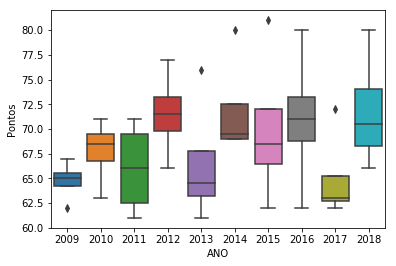

In [157]:
sb.boxplot(x=libertadores['ANO'], y=libertadores['Pontos'])

### Insights que podem ser extraídos do Boxplot Libertadores:
*Considerando que a maior dispersão significa, maior diferença de pontos entre os times, considero que isso é um indício de campeonato disputado. Quanto mais dispersa for a variável número de pontos, maior foi a disputa*. Sendo assim:

1. Em 2009 tivemos a maior disputa pelas vagas na libertadores visto que temos aparentemente a menor dispersão. Tivemos um outlier (ponto fora do padrão - veja o ponto próximo a parte inferior do gráfico), o que significa que o último time a se classificar ficou bem abaixo dos demais que classificaram.
2. Em 2015 tivemos a menor disputa pelas vagas na libertadores visto que temos aparentemente a maior dispersão com o primeiro colocado se dispersando bastante dos demais (conforme pode ser visto pelo ponto próximo da parte superior do gráfico).

**Para confirmar essas suposições (veja que o que afirmei foi com base na análise visual/intuitiva dos boxplots), exibiremos o grupo dos times classificados para a libertadores nos 2 anos citados**.

In [158]:
libertadores.loc[libertadores['ANO'] == 2009] ## Diferença de 5 pontos entre o primeiro e o último classificado

,ANO,Posicao,Time,Pontos,Vitoria,Empates,Derrotas,Gols pro,Gols Contra,Saldo Gols,Aproveitamento,Estados
0,2009,1,Flamengo,67,19,10,9,58,44,14,58.8,RJ
1,2009,2,Internacional,65,19,8,11,65,44,21,57.0,RS
2,2009,3,Sao Paulo,65,18,11,9,57,42,15,57.0,SP
3,2009,4,Cruzeiro,62,18,8,12,58,53,5,54.4,MG


In [159]:
libertadores.loc[libertadores['ANO'] == 2015] ## Diferença de 19 pontos entre o primeiro e o último classificado

,ANO,Posicao,Time,Pontos,Vitoria,Empates,Derrotas,Gols pro,Gols Contra,Saldo Gols,Aproveitamento,Estados
120,2015,1,Corinthians,81,24,9,5,71,31,40,71.0,SP
121,2015,2,Atletico MG,69,21,6,11,65,47,18,61.0,MG
122,2015,3,Gremio,68,20,8,10,52,32,20,60.0,RS
123,2015,4,Sao Paulo,62,18,8,12,53,47,6,54.0,SP


### Sul-americana insights:

In [160]:
explora_valores_minimos(sul_americana)

,Valores mínimos
2009,49
2010,47
2011,48
2012,49
2013,48
2014,47
2015,49
2016,51
2017,50
2018,45


In [161]:
print("O menor número de pontos necessários para um time atingir a classificação para a Sul-americana foi",
      sul_americana['Pontos'].min(),
      "pontos no ano de", 
      sul_americana.loc[sul_americana['Pontos'].idxmin(),'ANO'],
     "pelo", sul_americana.loc[sul_americana['Pontos'].idxmin(),'Time'], "\n")

O menor número de pontos necessários para um time atingir a classificação para a Sul-americana foi 45 pontos no ano de 2018 pelo Fluminense 



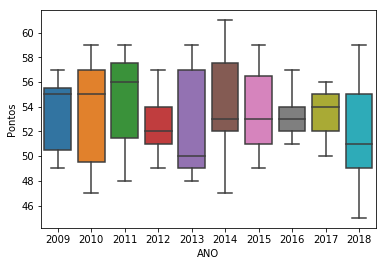

In [162]:
sb.boxplot(x=sul_americana['ANO'], y=sul_americana['Pontos'])

### Insights que podem ser extraídos do Boxplot Sul Americana:

*Considerando que a maior dispersão significa, maior diferença de pontos entre os times, considero que isso é um indício de campeonato disputado. Quanto mais dispersa for a variável número de pontos, maior foi a disputa*. Sendo assim:

1. Em 2016 tivemos a maior disputa pelas vagas na sul americana visto que temos aparentemente a menor dispersão. 
2. Em 2018 tivemos a menor disputa pelas vagas na sul americana visto que temos aparentemente a maior dispersão.

**Para confirmar essas suposições (veja que o que afirmei foi com base na análise visual/intuitiva dos boxplots), exibiremos o grupo dos times classificados para a sul-americana nos 2 anos citados**.

In [163]:
sul_americana.loc[sul_americana['ANO'] == 2016] # Diferença de 6 pontos entre o primeiro e o último classificado

,ANO,Posicao,Time,Pontos,Vitoria,Empates,Derrotas,Gols pro,Gols Contra,Saldo Gols,Aproveitamento,Estados
145,2016,6,Athletico PR,57,17,6,15,38,32,6,50.0,PR
146,2016,7,Corinthians,55,15,10,13,48,42,6,48.0,SP
147,2016,8,Ponte Preta,53,15,8,15,48,52,-4,46.0,SP
148,2016,9,Gremio,53,14,11,13,41,44,-3,46.0,RS
149,2016,10,Sao Paulo,52,14,10,14,44,36,8,46.0,SP
150,2016,11,Chapecoense,52,13,13,12,49,56,-7,46.0,SC
151,2016,12,Cruzeiro,51,14,9,15,48,49,-1,45.0,MG


In [164]:
sul_americana.loc[sul_americana['ANO'] == 2018] # Diferença de 14 pontos entre o primeiro e o último classificado

,ANO,Posicao,Time,Pontos,Vitoria,Empates,Derrotas,Gols pro,Gols Contra,Saldo Gols,Aproveitamento,Estados
185,2018,6,Atletico MG,59,17,8,13,56,43,13,51.7,MG
186,2018,7,Athletico PR,57,16,9,13,54,37,17,50.0,PR
187,2018,8,Cruzeiro,53,14,11,13,34,34,0,46.5,MG
188,2018,9,Botafogo,51,13,12,13,38,46,-8,44.7,RJ
189,2018,10,Santos,50,13,11,14,46,40,6,43.8,SP
190,2018,11,Bahia,48,12,12,14,39,41,-2,42.1,BA
191,2018,12,Fluminense,45,12,9,17,32,46,-14,39.5,RJ


### Não-rebaixados:

In [165]:
explora_valores_minimos(nao_rebaixados)

,Valores mínimos
2009,46
2010,42
2011,43
2012,45
2013,45
2014,40
2015,43
2016,45
2017,43
2018,43


In [166]:
print("O menor número de pontos necessários para um time atingir não ser rebaixado foi",
      nao_rebaixados['Pontos'].min(),
      "pontos no ano de", 
      nao_rebaixados.loc[nao_rebaixados['Pontos'].idxmin(),'ANO'],
     "pelo", nao_rebaixados.loc[nao_rebaixados['Pontos'].idxmin(),'Time'], "\n")

O menor número de pontos necessários para um time atingir não ser rebaixado foi 40 pontos no ano de 2014 pelo Palmeiras 



### ***Não irei explorar o boxplot dos não rebaixados visto que o importante é saber o número mínimo de pontos somente de quem entrou nesse grupo (não há diferenças significativas para um time entre ser o último não rebaixado ou o primeiro não rebaixado)***

### Rebaixados

In [167]:
explora_valores_minimos(rebaixados)

,Valores mínimos
2009,31
2010,28
2011,31
2012,30
2013,20
2014,32
2015,31
2016,28
2017,36
2018,23


In [168]:
print("A pior pontuação de um time no campeonato brasileiro foi",
      rebaixados['Pontos'].min(),
      "pontos no ano de", 
      rebaixados.loc[rebaixados['Pontos'].idxmin(),'ANO'],
     "pelo", rebaixados.loc[rebaixados['Pontos'].idxmin(),'Time'], "\n")

print("A melhor pontuação de um time que não o livrou do rebaixamento foi",
      rebaixados['Pontos'].max(),
      "pontos no ano de", 
      rebaixados.loc[rebaixados['Pontos'].idxmax(),'ANO'],
     "pelo", rebaixados.loc[rebaixados['Pontos'].idxmax(),'Time'], "\n")

A pior pontuação de um time no campeonato brasileiro foi 20 pontos no ano de 2013 pelo Nautico 

A melhor pontuação de um time que não o livrou do rebaixamento foi 45 pontos no ano de 2009 pelo Coritiba 



É muito importante saber interpretar os resultados obtidos. Como estou calculando o mínimo de pontos dos times que foram rebaixados, podemos concluir:
1. O menor número de pontos representa o pior desempenho dentre os campeonatos apurados (2009 até 2018)
2. O valor máximo de pontos representa o melhor desempenho de um time rebaixado, mas que não serviu para livrá-lo do rebaixamento

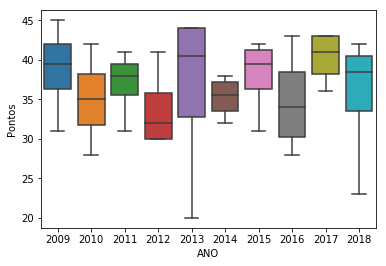

In [169]:
sb.boxplot(x=rebaixados['ANO'], y=rebaixados['Pontos'])

### Insights que podem ser extraídos do Boxplot Rebaixados:

*A interpretação é diferente dos demais boxplots. Aqui, conseguiremos ver basicamente piores (recorde negativo) e melhores desempenhos, mas que não foram suficientes para livrar o time do rebaixamento*. Sendo assim:

1. Em 2009 tivemos o melhor desempenho que não serviu para livrar um clube do rebaixamento
2. Em 2013 tivemos uma disputa menos acirrada entre os times que foram rebaixados visto que um time fez na casa dos 20 pontos enquanto outro fez cerca de 40
3. Em 2014 tivemos o time com melhor desempenho entre os rebaixados fazendo a menor pontuação (comparando todos os anos), o que pode ser um indício de que que o time que escapou do rebaixamento precisou de menos pontos em comparação aos anos anteriores

**Para confirmar essas suposições (veja que o que afirmei foi com base na análise visual/intuitiva dos boxplots), exibiremos o grupo dos times classificados para a libertadores nos 2 anos citados**.

In [170]:
rebaixados.loc[rebaixados['ANO'] == 2009]

,ANO,Posicao,Time,Pontos,Vitoria,Empates,Derrotas,Gols pro,Gols Contra,Saldo Gols,Aproveitamento,Estados
16,2009,17,Coritiba,45,12,9,17,48,60,-12,39.5,PR
17,2009,18,Santo Andre,41,11,8,19,46,61,-15,36.0,SP
18,2009,19,Nautico,38,10,8,20,48,71,-23,33.3,PE
19,2009,20,Sport,31,7,10,21,48,71,-23,27.2,PE


In [171]:
nao_rebaixados.loc[(nao_rebaixados['ANO'] == 2009)].loc[nao_rebaixados['Posicao'] == 16]
## Fluminense precisou fazer 46 pontos para escapar do rebaixamento em 2009 demonstrando a disputa acirrada.

,ANO,Posicao,Time,Pontos,Vitoria,Empates,Derrotas,Gols pro,Gols Contra,Saldo Gols,Aproveitamento,Estados
15,2009,16,Fluminense,46,11,13,14,49,56,-7,40.4,RJ


In [172]:
rebaixados.loc[rebaixados['ANO'] == 2013]

,ANO,Posicao,Time,Pontos,Vitoria,Empates,Derrotas,Gols pro,Gols Contra,Saldo Gols,Aproveitamento,Estados
96,2013,17,Portuguesa,44,12,12,14,50,46,4,42.0,SP
97,2013,18,Vasco,44,11,11,16,50,61,–11,38.0,RJ
98,2013,19,Ponte Preta,37,9,10,19,37,55,–18,32.0,SP
99,2013,20,Nautico,20,5,5,28,22,79,–57,17.0,PE


In [173]:
nao_rebaixados.loc[(nao_rebaixados['ANO'] == 2013)].loc[nao_rebaixados['Posicao'] == 16]
## Diferença entre o não rebaixado (Flamengo) e o pior rebaixado (Náutico) foi de 25 pontos

,ANO,Posicao,Time,Pontos,Vitoria,Empates,Derrotas,Gols pro,Gols Contra,Saldo Gols,Aproveitamento,Estados
95,2013,16,Flamengo,45,12,13,13,43,46,–3,43.0,RJ


In [174]:
rebaixados.loc[rebaixados['ANO'] == 2014]

,ANO,Posicao,Time,Pontos,Vitoria,Empates,Derrotas,Gols pro,Gols Contra,Saldo Gols,Aproveitamento,Estados
116,2014,17,Vitoria,38,10,8,20,37,54,-17,33.3,PE
117,2014,18,Bahia,37,9,10,19,31,43,-12,32.5,BA
118,2014,19,Botafogo,34,9,7,22,31,48,-17,29.8,RJ
119,2014,20,Criciuma,32,7,11,20,28,56,-28,28.1,SC


In [175]:
nao_rebaixados.loc[(nao_rebaixados['ANO'] == 2014)].loc[nao_rebaixados['Posicao'] == 16]
## Palmeiras precisou apenas de 40 pontos para escapar do rebaixamento em 2014
## Em 2009, o Coritiba com 45 pontos não conseguiu se livrar do rebaixamento o que demonstra do campeonato nesses anos

,ANO,Posicao,Time,Pontos,Vitoria,Empates,Derrotas,Gols pro,Gols Contra,Saldo Gols,Aproveitamento,Estados
115,2014,16,Palmeiras,40,11,7,20,34,59,-25,35.1,SP
